<a href="https://colab.research.google.com/github/murtazav/Model_predictive_control/blob/master/Bicycle_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.animation as animation
import numpy as np
from gekko import GEKKO


In [0]:
!pip install gekko

     |████████████████████████████████| 10.4MB 2.5MB/s 
  Stored in directory: /root/.cache/pip/wheels/01/6b/eb/6c632fcb27d36752f74c76b6a5d502eef02d33b9f76659fe2f
Successfully built gekko


In [0]:
#Defining a model
m = GEKKO()

#Defining the time, we will go beyond the 6.2s
#to check if the objective was achieved
n = 75
tf = 6.0
m.time = np.linspace(0,tf,n)
heading_final = 20*np.pi/180


#Parameters

l = m.Param(value=1.93)
w = m.Param(value=0.90)
lf = m.Param(value=1.31) 
lr = m.Param(value=0.62)
mfl = m.Param(value=158)
mfr = m.Param(value=137)
mrl = m.Param(value=360)
mrr = m.Param(value=269)
Iz = m.Param(value=932.4)
Cf = m.Param(value=27359)
Cr = m.Param(value=58335)
vx = m.Param(value=1)
M = mfl + mfr + mrl + mrr
#MV
delta = m.Var(value=0)

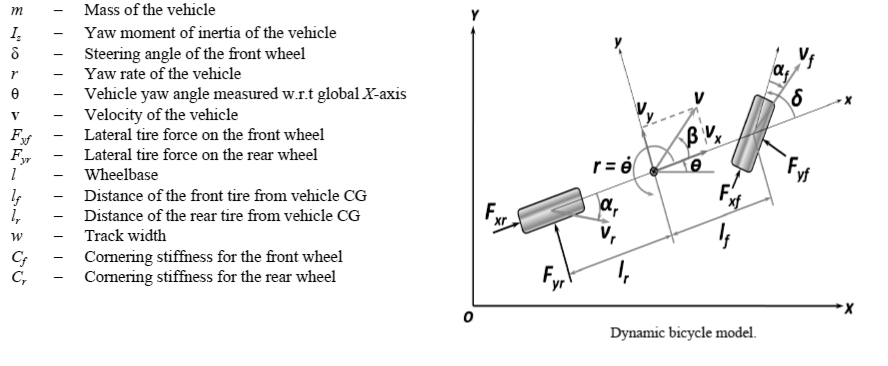

In [7]:
import cv2
from google.colab.patches import cv2_imshow
im=cv2.imread('BM.png',0)
cv2_imshow(im)

In [0]:
#State VariablesM
r = m.Var(value=0)
vy = m.Var(value=0)

#Intermediates


#Defining the State Space Model
m.Equation(vy.dt() == -((Cf+Cr)/(vx*M))*vy - (M*vx +(Cf*lf-Cr*lr)/vx)*r + (Cf/M)*delta)
m.Equation(r.dt() == -((Cf*lf-Cr*lr)/(vx*Iz))*vy - ((Cf*(lf**2)+Cr*(lr**2))/(vx*Iz))*r + (Cf*lf/Iz)*delta)

#Definine the Objectives
#Make all the state variables be zero at endpoints
i = heading_final
m.fix(vy,i,0.0)
m.fix(r,i,0.0)

